# Composite Stellar Population (CSP) tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We define a function for formatting the axes' ticks:

In [2]:
def format_axes_ticks(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelsize=14)

The `galapy.CompositeStellarPopulation` module defines classes and functions for reading and operating on Simple Stellar Population, properly formatted, tables.
These tables can be combined into composite populations (CSP), driving the kernel emission processes from galaxies.

It can be imported via:

In [3]:
import galapy.CompositeStellarPopulation as gpcsp 

Or called from the global namespace of the library:

```python
>>> import galapy as gp
>>> gp.CompositeStellarPopulation
<module 'galapy.CompositeStellarPopulation' from '/path/to/installed/version/of/galapy/CompositeStellarPopulation.py'>
```

The module provides access to already formatted SSP tables, a list of which can be print on screen with the dedicated function:

In [4]:
gpcsp.print_ssp_libs()

Available SSP formats
---------------------
* bc03.basel.chab.extend;
* bc03.basel.chab.refined;
* bc03.stelib.chab.extend;
* bc03.stelib.chab.extrap;
* br22.NT;
* br22.NTL;
* br22.NT.refined;
* br22.NTL.refined;



In order to build an object of type CSP the user has to select among these tables, the default being `'bc03.basel.chab.extend'`:

In [5]:
csp = gpcsp.CSP( ssp_lib = 'bc03.basel.chab.extend' )

The above command has loaded the full table encoded in the provided binary file, splitting it into the three arrays
* `csp.l`: wavelenght grid 
* `csp.t`: time grid
* `csp.Z`: metallicity grid

and an array `csp.L` of size `len(csp.l)*len(csp.t)*len(csp.Z)` containing the actual luminosity table.

This latter array can be indexed in three dimensions:
* `il`: index in the wavelenght grid
* `it`: index in the time grid
* `iz`: index in the metallicity grid

through the function `csp.SSP(il,it,iz)`, that is equivalent of indexing a re-shaped version of the array:
```python
SSP_table = csp.L.reshape( len(csp.l), len(csp.t), len(csp.Z) )
SSP_table[il,it,iz]
```

This operations on the SSP table allow to extract the emission of single SSPs:

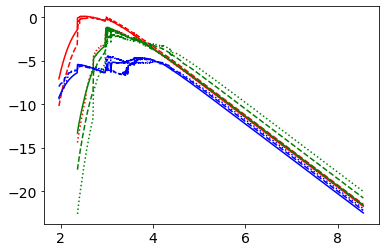

In [6]:
itv, stv = [ 10, 100, 220 ], [ 'r', 'g', 'b' ]
izv, szv = [ 0, 3, 6 ], [ '-', '--', ':' ]
fig = plt.figure(figsize=(6,4))
for it, st in zip( itv, stv ) :
    for iz, sz in zip( izv, szv ) :
        plt.plot( np.ma.log10( csp.l ), np.ma.log10( [ csp.SSP( il, it, iz ) for il in range( csp.l.shape[0] ) ] ), 
                  color=st, linestyle=sz )
format_axes_ticks(fig)

## Computing the CSP by assuming a SFH

As mentioned, SSPs can be combined into a Composite Stellar Population (CSP), operation which obviously requires to assume a Star Formation History (SFH). This can be done by building an object of type SFH, implemented in the dedicated module of the library:

In [7]:
from galapy.StarFormationHistory import SFH
sfh = SFH()

We can than compute the resulting emission at different CSP-ages by calling the function `csp.emission`.
This function takes two positional arguments, the age of the population and the assumed SFH:

In [8]:
ages = [ 1.e+7, 1.e+8, 1.e+9 ]
Lcsp = [ csp.emission( age, sfh ) for age in ages ]

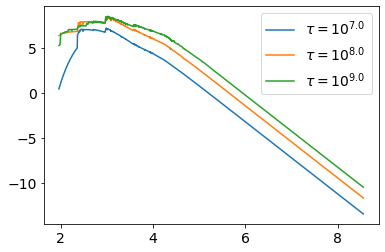

In [9]:
fig = plt.figure(figsize=(6,4))
for LL, age in zip( Lcsp, ages ) :
    plt.plot( np.ma.log10( csp.l ), np.ma.log10( LL ), label = f'$\\tau = 10^{{{np.log10(age):.1f}}} $' )
plt.legend(fontsize=14)
format_axes_ticks(fig)

## Why the $f(\tau)$ weighting does not work with a 1D array?

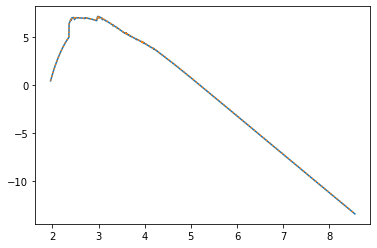

In [10]:
ages = [ 1.e+7, 1.e+8, 1.e+9 ]
age = ages[0]
ftau = np.tile(np.exp(1.e-8 * csp.t), csp.l.size) 

LL = csp.emission( age, sfh )
Lf = csp.emission( age, sfh, ftau=ftau )
plt.plot(np.ma.log10(csp.l), np.ma.log10(LL))
plt.plot(np.ma.log10(csp.l), np.ma.log10(Lf), ':')